LAB 3


In [1]:
#PART 1
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig 

#Defined unit step and ramp functions
def u(t):
    if t < 0:
        return 0
    if t >= 0:
        return 1
    
def r(t):
    if t < 0: 
        return 0
    if t >= 0:
        return t 
    
#Defined functions for equations    
def f1(t): 
    a = np.zeros((len(t), 1))
    for i in range(len(t)):
        a[i] = u(t[i]-2)-u(t[i]-9)
    return a

def f2(t):
    b = np.zeros((len(t), 1))
    for i in range(len(t)):
        b[i] = np.exp(-t[i])*u(t[i])
    return b

def f3(t): 
    c = np.zeros((len(t), 1))
    for i in range(len(t)):
        c[i] = r(t[i]-2)*(u(t[i]-2)-u(t[i]-3))+r(4-t[i])*(u(t[i]-3)-u(t[i]-4))
    return c

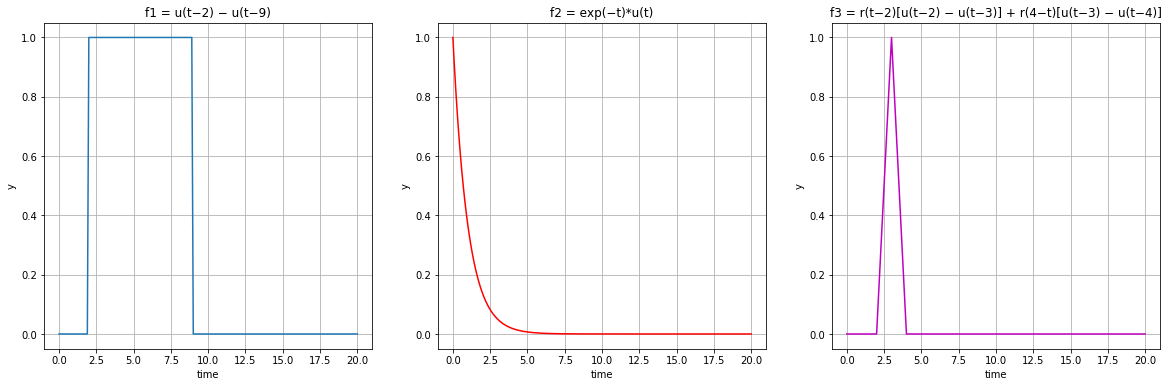

In [2]:
#Graphs for each equation
steps = .1
t = np.arange(0,20+steps,steps)

a = f1(t)
b = f2(t)
c = f3(t)

myFigSize = (20,6)
plt.figure(figsize=myFigSize)

plt.subplot(1,3,1)
plt.plot(t,a)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f1 = u(t−2) − u(t−9)')

plt.subplot(1,3,2)
plt.plot(t,b,'r')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f2 = exp(−t)*u(t)')

plt.subplot(1,3,3)
plt.plot(t,c, 'm')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f3 = r(t−2)[u(t−2) − u(t−3)] + r(4−t)[u(t−3) − u(t−4)]')
plt.show()

In [3]:
#PART 2

#User defined function for convolutions

def my_convo(f1,f2):
    length_f1 = np.size(f1)  #size of first function
    length_f2 = np.size(f2)  #size of second function
    
    #Result with be as large as the added lengths of the functions 
    #-1 because they share t = 0 on the timeline. 
    
    result = np.zeros(length_f1 + length_f2 -1) 

    for m in np.arange(length_f1):       #for any time in the f1,
        for n in np.arange(length_f2):   #take the same time in f2. 
            result[m+n] = result[m+n] + f1[m]*f2[n]  
            #multiply these points and add with previous results.
            #This produces an integral 
            
    return result 

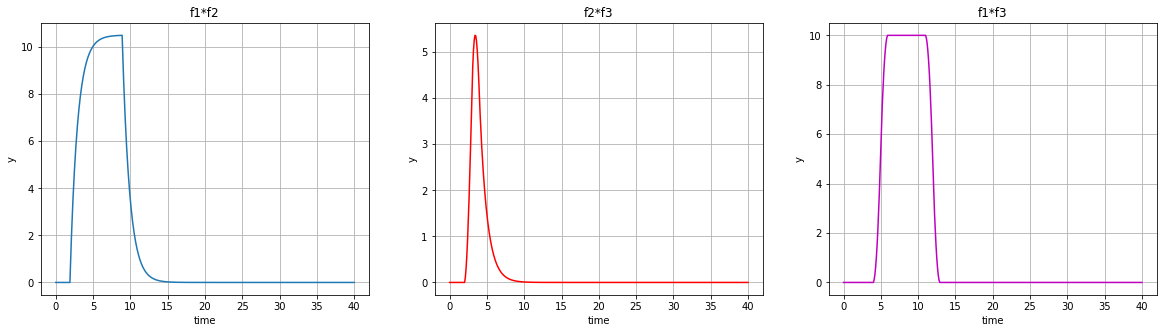

In [4]:
#Graphs for user defined
steps = .1
t = np.arange(0,20+steps,steps)
NN = len(t)
tExtended = np.arange(0, 2*t[NN-1]+steps, steps)

a = f1(t)
b = f2(t)
c = f3(t)

my_conv_1 = my_convo(a,b)
my_conv_2= my_convo(b,c)
my_conv_3= my_convo(a,c)

myFigSize = (20,5)
plt.figure(figsize=myFigSize)

plt.subplot(1,3,1)
plt.plot(tExtended,my_conv_1)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f1*f2')

plt.subplot(1,3,2)
plt.plot(tExtended,my_conv_2,'r')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f2*f3')

plt.subplot(1,3,3)
plt.plot(tExtended,my_conv_3, 'm')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f1*f3')
plt.show()

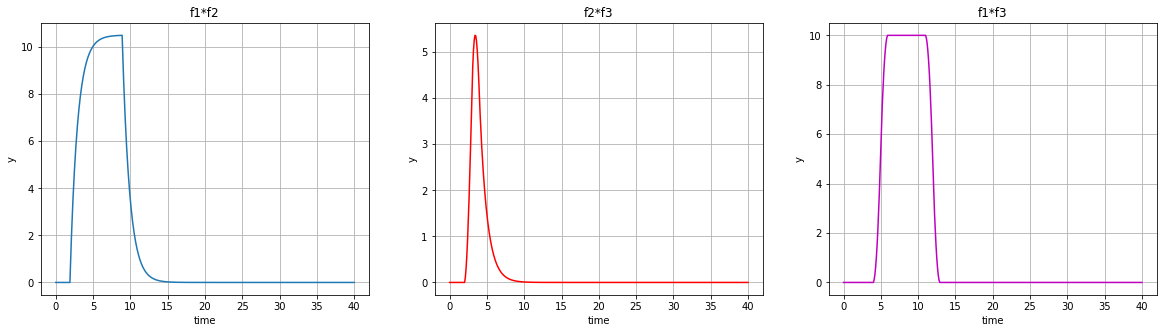

In [5]:
#Graphs for scipy.signal.convolve()
conv_1 = sig.convolve(a,b)
conv_2 = sig.convolve(b,c)
conv_3 = sig.convolve(a,c)

myFigSize = (20,5)
plt.figure(figsize=myFigSize)

plt.subplot(1,3,1)
plt.plot(tExtended,conv_1)
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f1*f2')

plt.subplot(1,3,2)
plt.plot(tExtended,conv_2,'r')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f2*f3')

plt.subplot(1,3,3)
plt.plot(tExtended,conv_3, 'm')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('y')
plt.title('f1*f3')
plt.show()